# Workshop 2: Fundamentals of CNN

In this workshop we will learn how to implement a simple Convolutional Neural Netwrok and we will compare it with a Fully Connected Neural Network for the classification of CIFAR10 dataset. The structure of the workshop will be the following:



1.   CIFAR10 with Fully Connected Neural Netoworks
2.   CIFAR10 with Convolutional Neural Networks



## 1. CIFAR10 with Fully Connected Neural Networks

In [ ]:
# Import dependence for downloading CIFAR10
from tensorflow import keras
from keras.datasets import cifar10

In [ ]:
(X_train, y_train), (X_testval, y_testval) = cifar10.load_data()

In [ ]:
# Import dependence for handling arrays
import numpy as np

In [ ]:
# Show the shape of the data partitions
print("X_train original shape:", X_train.shape)
print("y_train original shape:", y_train.shape)
print("X_testval original shape:", X_testval.shape)
print("y_testval original shape:", y_testval.shape)

X_train original shape: (50000, 32, 32, 3)
y_train original shape: (50000, 1)
X_testval original shape: (10000, 32, 32, 3)
y_testval original shape: (10000, 1)


In [ ]:
# Show the data type of the data partitions
print("X_train original dtype:", X_train.dtype)
print("y_train original dytpe:", y_train.dtype)
print("X_testval original dtype:", X_testval.dtype)
print("y_testval original dtype:", y_testval.dtype)

X_train original dtype: uint8
y_train original dytpe: uint8
X_testval original dtype: uint8
y_testval original dtype: uint8


In [ ]:
# Show the data range of the data partitions
print("X_train original range: [", X_train.min(), ",", X_train.max(), "]")
print("X_testval original range: [", X_train.min(), ",", X_testval.max(), "]")

X_train original range: [ 0 , 255 ]
X_testval original range: [ 0 , 255 ]


In [ ]:
# Show the different labels of the data partitions
print("y_train labels: \n", np.unique(y_train))
print("y_testval labels: \n", np.unique(y_testval))

y_train labels: 
 [0 1 2 3 4 5 6 7 8 9]
y_testval labels: 
 [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Import dependence for visualization of images
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)  # Configure figure size for
                                          # appropriate visualization

In [ ]:
def class_to_string(class_int):
    classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
               "horse", "ship", "truck"]
    return classes[class_int]

<ipython-input-16-9a64cf2a0d2c>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_str = class_to_string(int(y_train[i]))


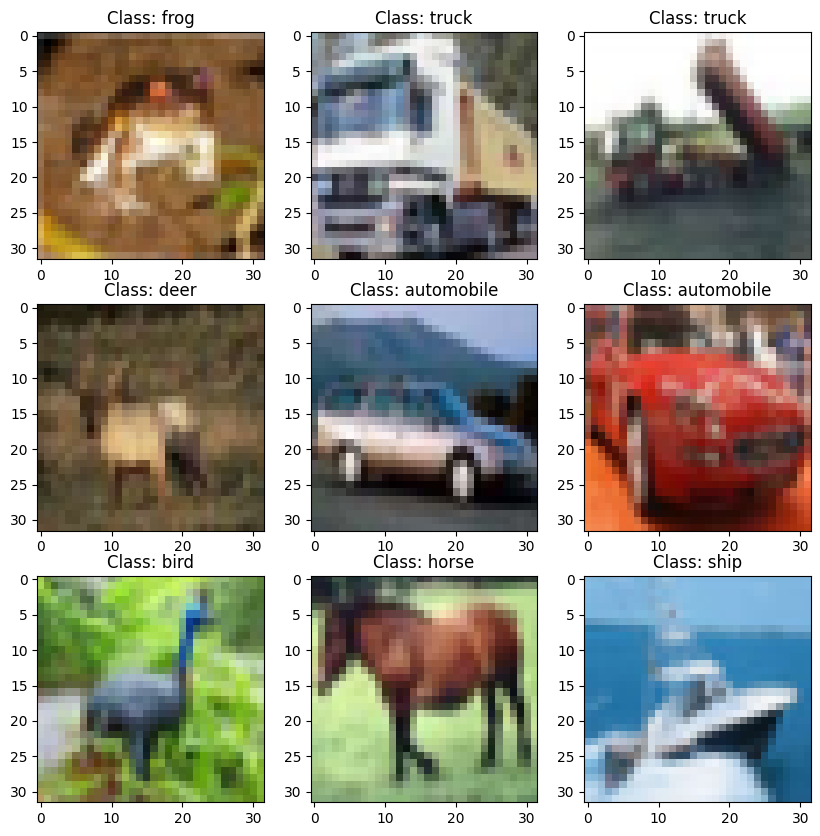

In [ ]:
# Show 9 images with its respective ground truth labels
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    class_str = class_to_string(int(y_train[i]))
    plt.title("Class: " + class_str)

In [ ]:
# Convert the 2D images to 1D array
train_samples = X_train.shape[0]
testval_samples = X_testval.shape[0]
sample_dims = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]  # 32*32*3
X_train_rs = X_train.reshape(train_samples, sample_dims)
X_testval_rs = X_testval.reshape(testval_samples, sample_dims)

In [ ]:
# Show shape of the reshaped dataset
print("Training matrix shape:", X_train_rs.shape)
print("Testing matrix shape:", X_testval_rs.shape)

Training matrix shape: (50000, 3072)
Testing matrix shape: (10000, 3072)


In [ ]:
# Convert dtype to float32
X_train_fl = X_train_rs.astype('float32')
X_testval_fl = X_testval_rs.astype('float32')

In [ ]:
# Show dtype of the dataset
print("Training matrix dtype:", X_train_fl.dtype)
print("Testing matrix dtype:", X_testval_fl.dtype)

Training matrix dtype: float32
Testing matrix dtype: float32


In [ ]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl /= 255
X_testval_fl /= 255

In [ ]:
# Show the range of pixels
print("Training matrix range:", "[", X_train_fl.min(), ",", X_train_fl.max(), "]")
print("Testing matrix range:", "[", X_testval_fl.min(), ",", X_testval_fl.max(), "]")

Training matrix range: [ 0.0 , 1.0 ]
Testing matrix range: [ 0.0 , 1.0 ]


In [ ]:
# Import dependence for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(train_samples, 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(testval_samples, 1)).toarray()

In [ ]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (50000, 10)
Testing one-hot encoded labels shape: (10000, 10)


In [ ]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [ ]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 3072)
Testing matrix shape: (5000, 3072)


In [ ]:
# Import dependencies for network dessign
from keras.models import Model
from keras.layers import Input, Dense

In [ ]:
# Define the model
input_layer = Input(shape=(X_train_fl.shape[1],))
hidden_layer_1= Dense(128, activation='relu')(input_layer)
hidden_layer_2= Dense(256, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(256, activation='relu')(hidden_layer_2)
output_layer = Dense(10, activation='softmax')(hidden_layer_3)
model= Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Show a summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 494730 (1.89 MB)
Trainable params: 494730 (1.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=100, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/100
391/391 [==============================] - 5s 6ms/step - loss: 1.8444 - accuracy: 0.3305 - val_loss: 1.6801 - val_accuracy: 0.4074
Epoch 2/100
391/391 [==============================] - 2s 6ms/step - loss: 1.6699 - accuracy: 0.3991 - val_loss: 1.5812 - val_accuracy: 0.4356
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 1.5773 - accuracy: 0.4340 - val_loss: 1.5316 - val_accuracy: 0.4540
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 1.5218 - accuracy: 0.4548 - val_loss: 1.5102 - val_accuracy: 0.4610
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 1.4854 - accuracy: 0.4676 - val_loss: 1.4755 - val_accuracy: 0.4782
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 1.4506 - accuracy: 0.4794 - val_loss: 1.4738 - val_accuracy: 0.4700
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 1.4201 - accuracy: 0.4909 - val_loss: 1.4534 - val_accuracy: 0.4714

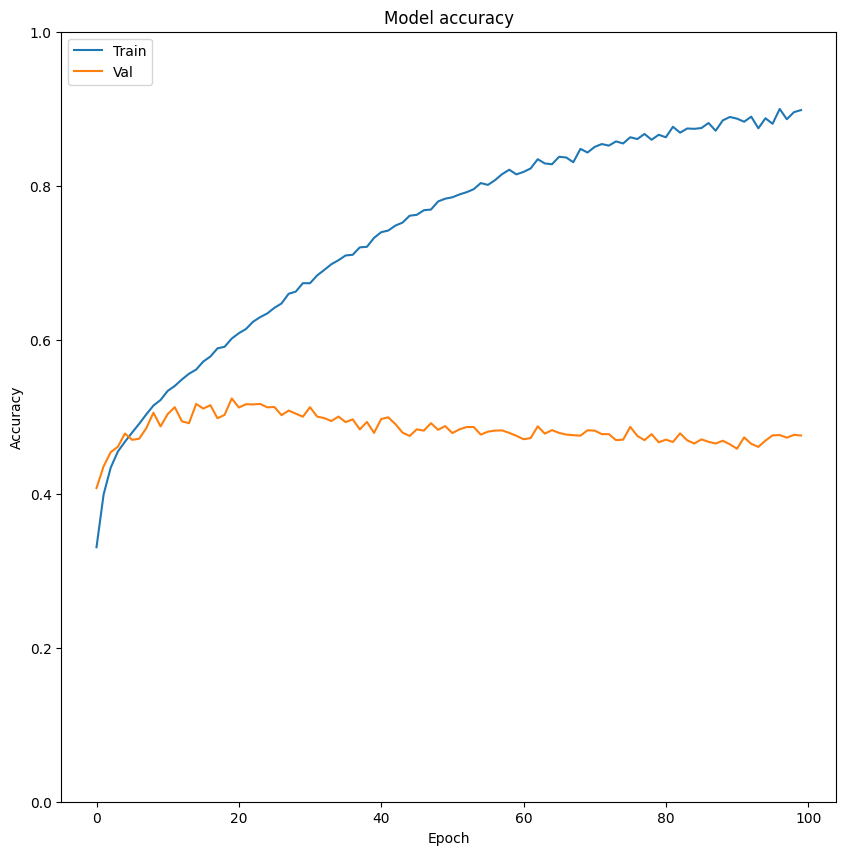

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

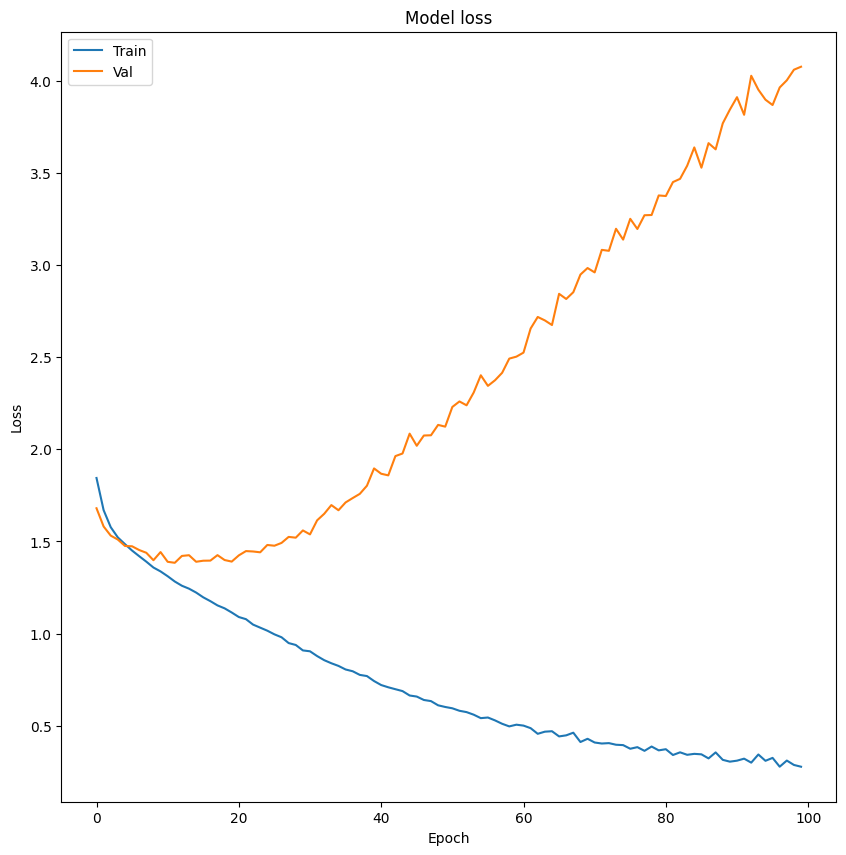

In [ ]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 4.101282596588135
Test accuracy: 0.4717999994754791


In [ ]:
# Predict test samples post-process them
predicted_classes = model.predict(X_test)
predicted_classes = np.round(predicted_classes)
predicted_classes = np.argmax(predicted_classes, axis=1)

157/157 [==============================] - 0s 2ms/step


In [ ]:
# Convert test labels to scalars
y_test_scalar = np.argmax(y_test, axis=1)

In [ ]:
# Obtain test samples correctly predicted
correct_indices = np.nonzero(predicted_classes == y_test_scalar)[0]

In [ ]:
# Obtain test samples incorrectly predicted
incorrect_indices = np.nonzero(predicted_classes != y_test_scalar)[0]

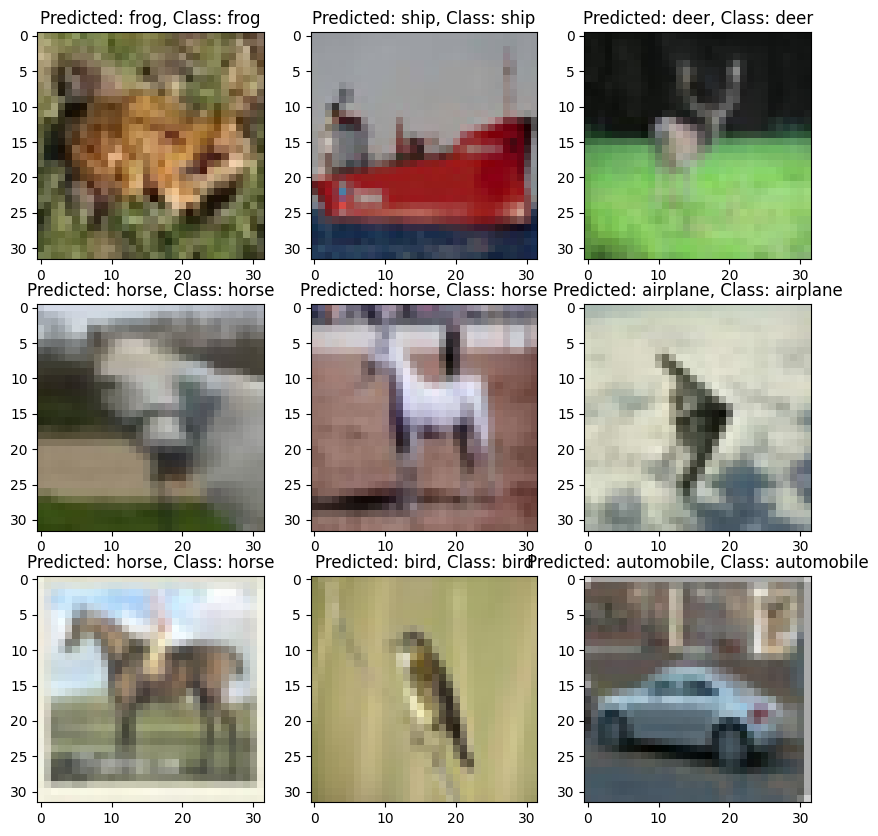

In [ ]:
# Show some correctly classified samples
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(32,32,3), cmap='gray',
               interpolation='none')
    predicted_str = class_to_string(predicted_classes[correct])
    y_test_str = class_to_string(y_test_scalar[correct])
    plt.title("Predicted: " + predicted_str + ", Class: " + y_test_str)

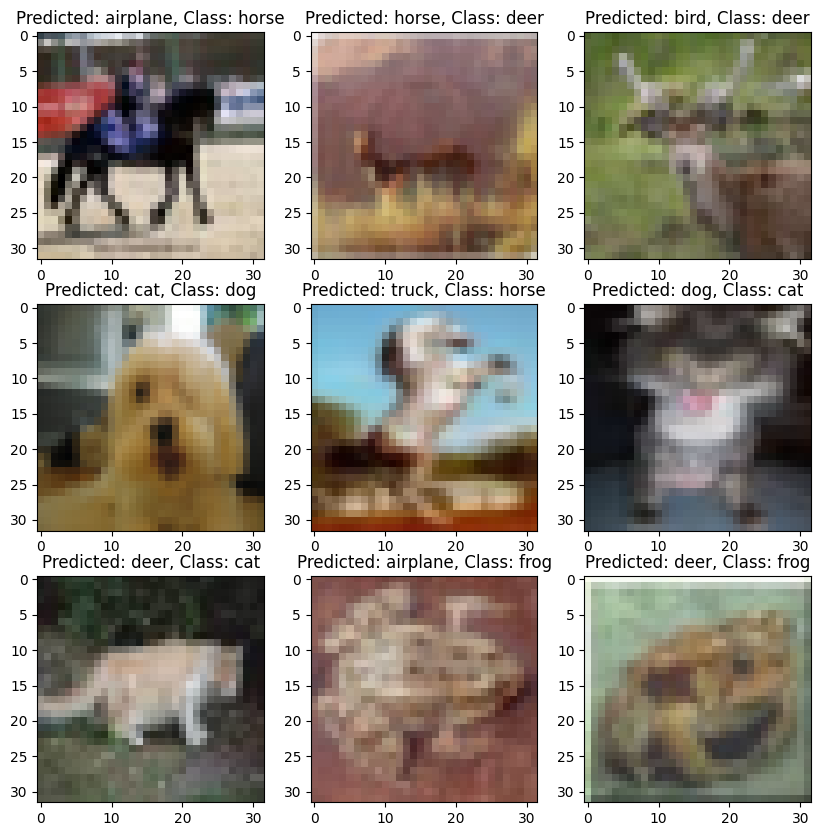

In [ ]:
# Show some incorrectly classified samples
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(32,32,3), cmap='gray',
               interpolation='none')
    predicted_str = class_to_string(predicted_classes[incorrect])
    y_test_str = class_to_string(y_test_scalar[incorrect])
    plt.title("Predicted: " + predicted_str + ", Class: " + y_test_str)

# 2. CIFAR10 with Convolutional Neural Networks

In [ ]:
# Show the shape of the data partitions
print("X_train original shape:", X_train.shape)
print("y_train one-hot shape:", y_train_oh.shape)

X_train original shape: (50000, 32, 32, 3)
y_train one-hot shape: (50000, 10)


There is no need to reshape since CNN are designed to handle images, what we need to redo is the following:


1.   Change range to [0 1]
2.   Split data in validation and test



In [ ]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl2 = X_train.astype('float32')
X_testval_fl2 = X_testval.astype('float32')
X_train_fl2 /= 255
X_testval_fl2 /= 255

In [ ]:
# Show the range of pixels
print("Training matrix range:", "[", X_train_fl2.min(), ",",
      X_train_fl2.max(), "]")
print("Testing matrix range:", "[", X_testval_fl2.min(), ",",
      X_testval_fl2.max(), "]")

Training matrix range: [ 0.0 , 1.0 ]
Testing matrix range: [ 0.0 , 1.0 ]


In [ ]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val2 = X_testval_fl2[:samples_test_nb]
y_val2 = y_testval_oh[:samples_test_nb]
X_test2 = X_testval_fl2[samples_test_nb:]
y_test2 = y_testval_oh[samples_test_nb:]

In [ ]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val2.shape)
print("Testing matrix shape:", X_test2.shape)

Validation matrix shape: (5000, 32, 32, 3)
Testing matrix shape: (5000, 32, 32, 3)


In [ ]:
# Import depence for CNN
from keras.layers import Conv2D, MaxPool2D, Flatten

In [ ]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
output_layer = Dense(10, activation='softmax')(dense_layer)
model= Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Show summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          4640

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_fl2, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val2, y_val2))

Epoch 1/20
391/391 [==============================] - 6s 7ms/step - loss: 1.7358 - accuracy: 0.3626 - val_loss: 1.4923 - val_accuracy: 0.4662
Epoch 2/20
391/391 [==============================] - 3s 6ms/step - loss: 1.4250 - accuracy: 0.4878 - val_loss: 1.3501 - val_accuracy: 0.5230
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 1.3143 - accuracy: 0.5315 - val_loss: 1.2761 - val_accuracy: 0.5484
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.2399 - accuracy: 0.5614 - val_loss: 1.2173 - val_accuracy: 0.5692
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 1.1752 - accuracy: 0.5823 - val_loss: 1.1619 - val_accuracy: 0.5900
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 1.1237 - accuracy: 0.6041 - val_loss: 1.1318 - val_accuracy: 0.5986
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 1.0774 - accuracy: 0.6211 - val_loss: 1.0840 - val_accuracy: 0.6238
Epoch 

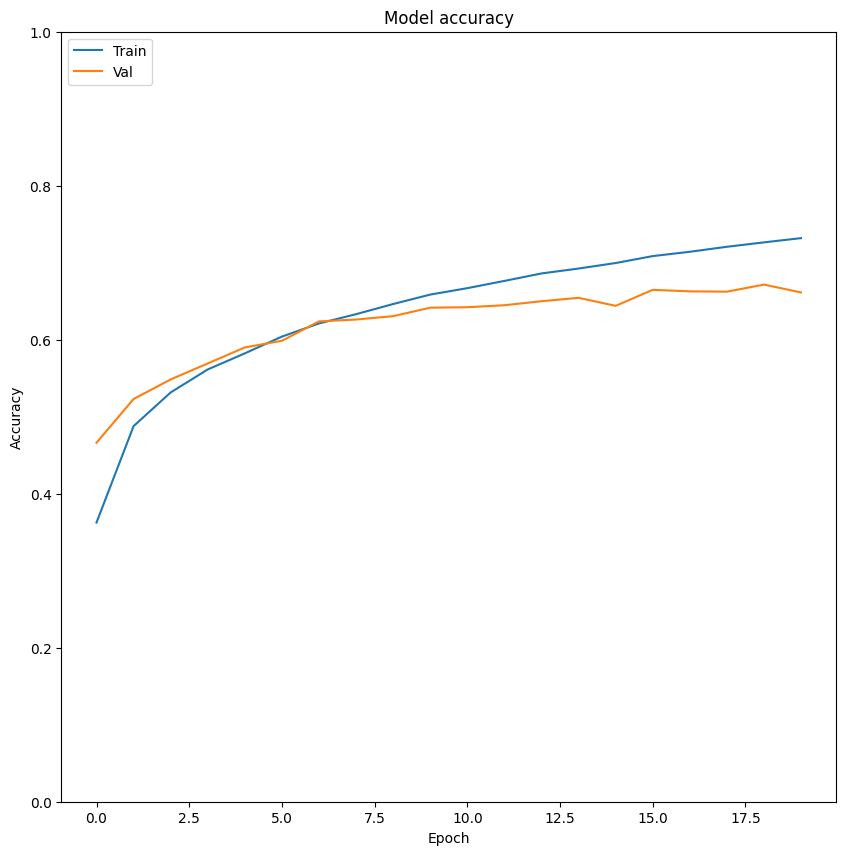

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

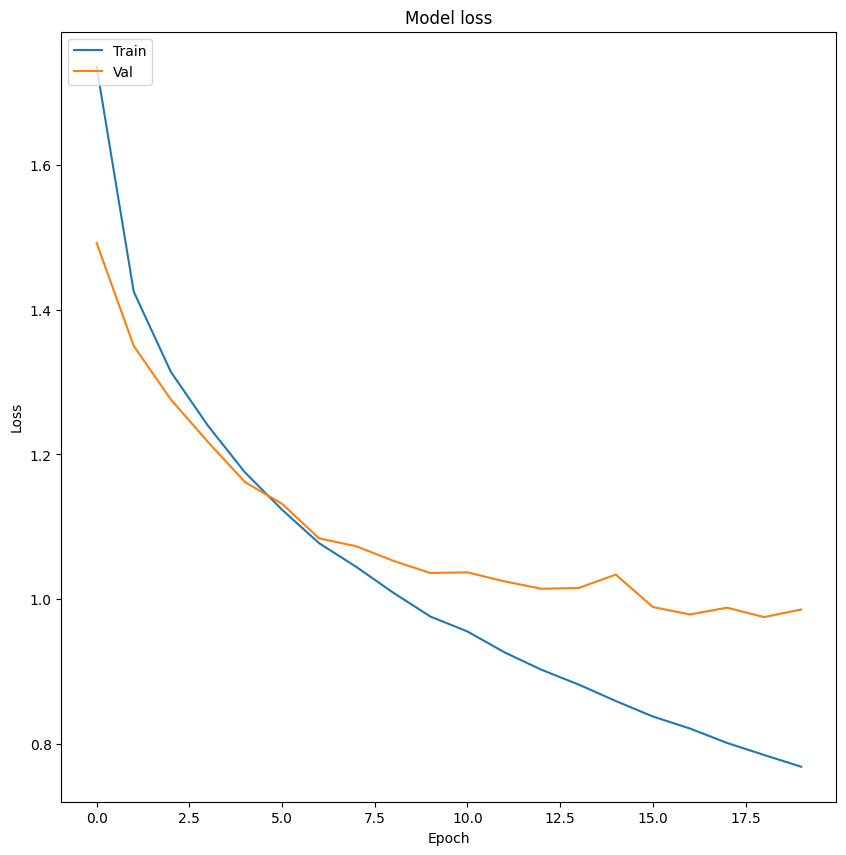

In [ ]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
# Obtain metrics in the test partition
score = model.evaluate(X_test2, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.004217267036438
Test accuracy: 0.6571999788284302


In [ ]:
# Predict test samples post-process them
predicted_classes = model.predict(X_test2)
predicted_classes = np.round(predicted_classes)
predicted_classes = np.argmax(predicted_classes, axis=1)

157/157 [==============================] - 0s 2ms/step


In [ ]:
# Convert test labels to scalars
y_test_scalar = np.argmax(y_test, axis=1)

In [ ]:
# Obtain test samples correctly predicted
correct_indices = np.nonzero(predicted_classes == y_test_scalar)[0]

In [ ]:
# Obtain test samples incorrectly predicted
incorrect_indices = np.nonzero(predicted_classes != y_test_scalar)[0]

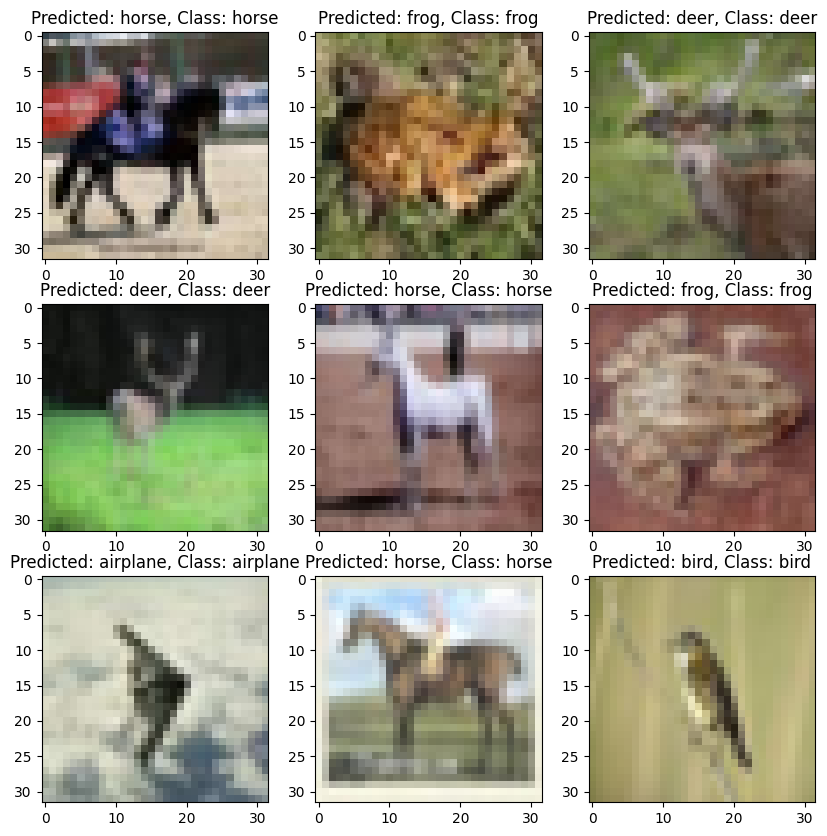

In [ ]:
# Show some correctly classified samples
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(32,32,3), cmap='gray',
               interpolation='none')
    predicted_str = class_to_string(predicted_classes[correct])
    y_test_str = class_to_string(y_test_scalar[correct])
    plt.title("Predicted: " + predicted_str + ", Class: " + y_test_str)

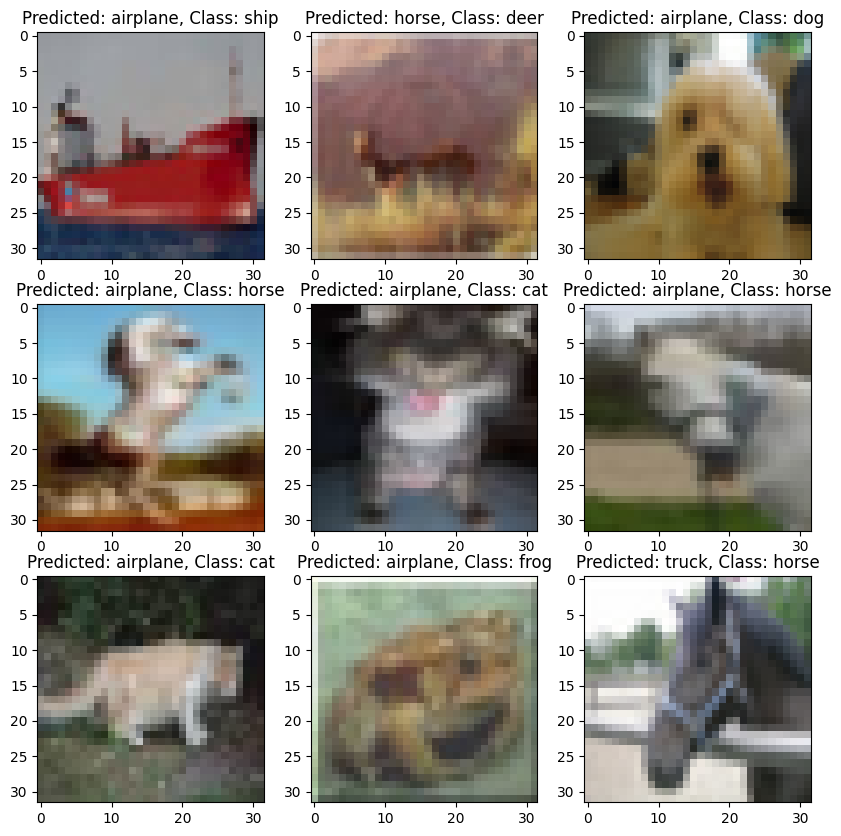

In [ ]:
# Show some incorrectly classified samples
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(32,32,3), cmap='gray',
               interpolation='none')
    predicted_str = class_to_string(predicted_classes[incorrect])
    y_test_str = class_to_string(y_test_scalar[incorrect])
    plt.title("Predicted: " + predicted_str + ", Class: " + y_test_str)

# Exercise 1: Train the CNN model with 50 epochs

In [ ]:
# Train the model
history = model.fit(X_train_fl2, y_train_oh, epochs=50, batch_size=128,
                    validation_data=(X_val2, y_val2))


Epoch 1/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5726 - accuracy: 0.7988 - val_loss: 1.0818 - val_accuracy: 0.6662
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5649 - accuracy: 0.8006 - val_loss: 1.0846 - val_accuracy: 0.6640
Epoch 3/50
391/391 [==============================] - 3s 7ms/step - loss: 0.5467 - accuracy: 0.8082 - val_loss: 1.1122 - val_accuracy: 0.6612
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5387 - accuracy: 0.8090 - val_loss: 1.1284 - val_accuracy: 0.6596
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5282 - accuracy: 0.8152 - val_loss: 1.1437 - val_accuracy: 0.6610
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5141 - accuracy: 0.8197 - val_loss: 1.1693 - val_accuracy: 0.6540
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.4989 - accuracy: 0.8244 - val_loss: 1.1675 - val_accuracy: 0.6558
Epoch 

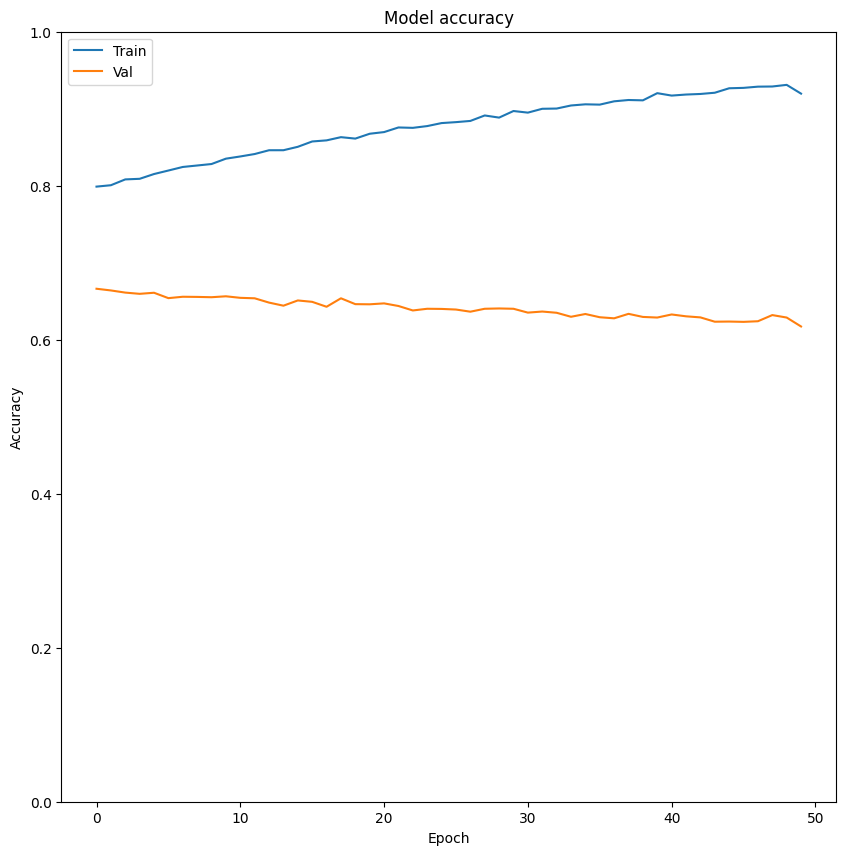

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

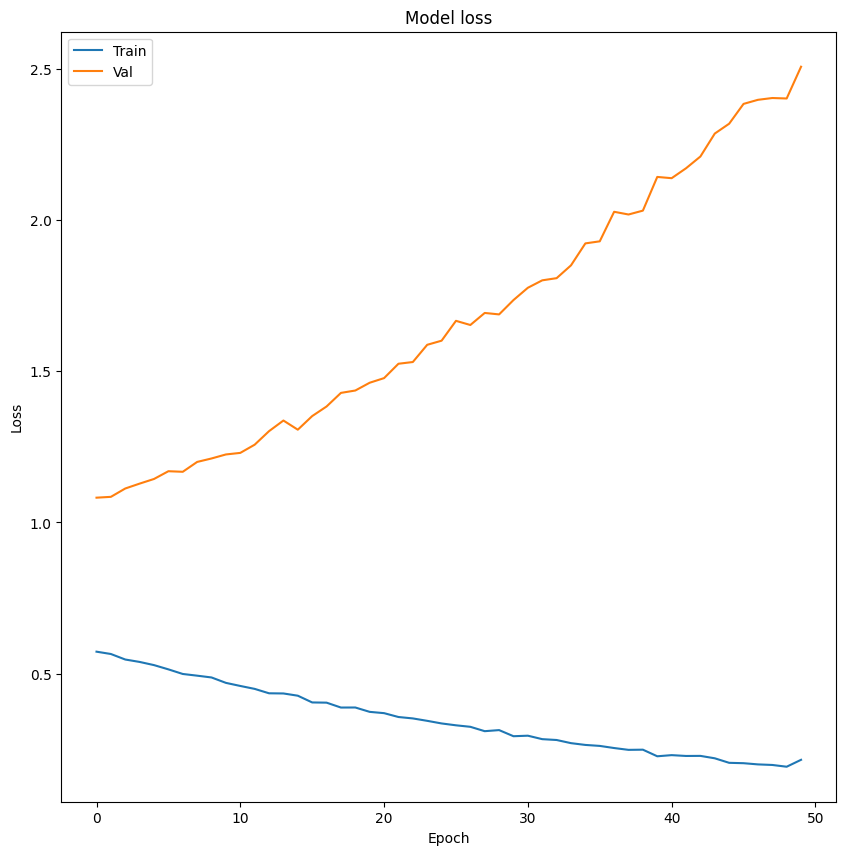

In [ ]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Exercise 2: Double the number of filters in each Conv layer and re-train

In [ ]:
# Define the model

input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
output_layer = Dense(10, activation='softmax')(dense_layer)
model= Model(inputs=input_layer, outputs=output_layer)


In [ ]:
# Show summary of the model

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          1849

In [ ]:
# Compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Train the model
# Train the model
history = model.fit(X_train_fl2, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val2, y_val2))


Epoch 1/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0803 - accuracy: 0.9710 - val_loss: 2.5047 - val_accuracy: 0.6776
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0719 - accuracy: 0.9750 - val_loss: 2.5387 - val_accuracy: 0.6824
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0803 - accuracy: 0.9706 - val_loss: 2.6030 - val_accuracy: 0.6772
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0836 - accuracy: 0.9711 - val_loss: 2.4874 - val_accuracy: 0.6910
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0575 - accuracy: 0.9805 - val_loss: 2.5447 - val_accuracy: 0.6838
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0417 - accuracy: 0.9862 - val_loss: 2.5970 - val_accuracy: 0.6842
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0630 - accuracy: 0.9773 - val_loss: 2.7758 - val_accuracy: 0.6830
Epoch 

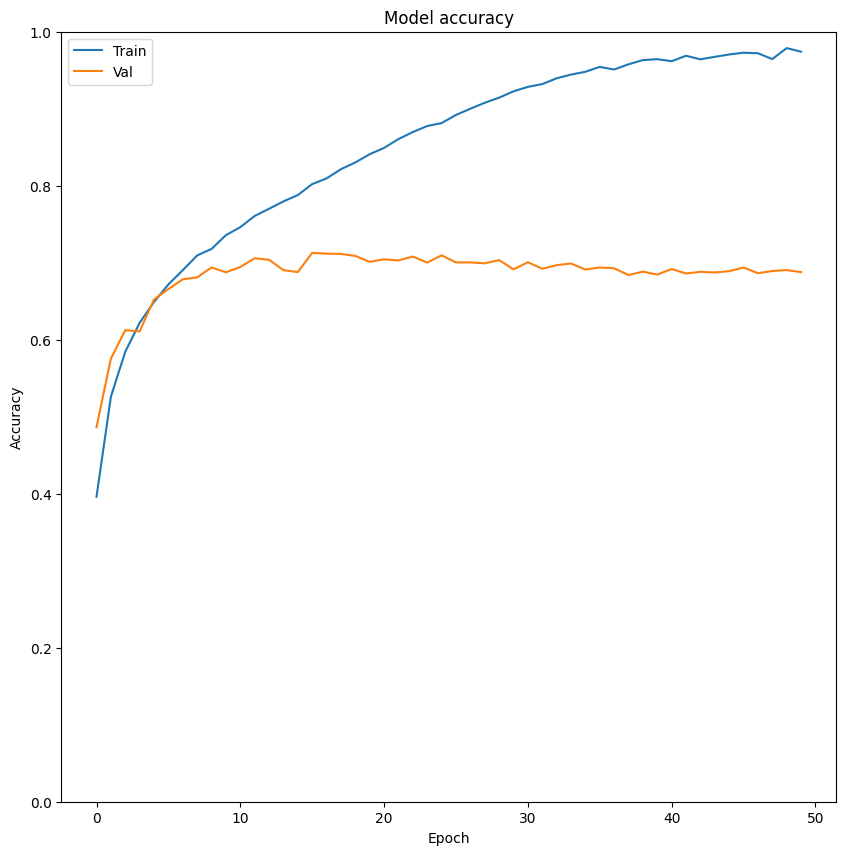

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

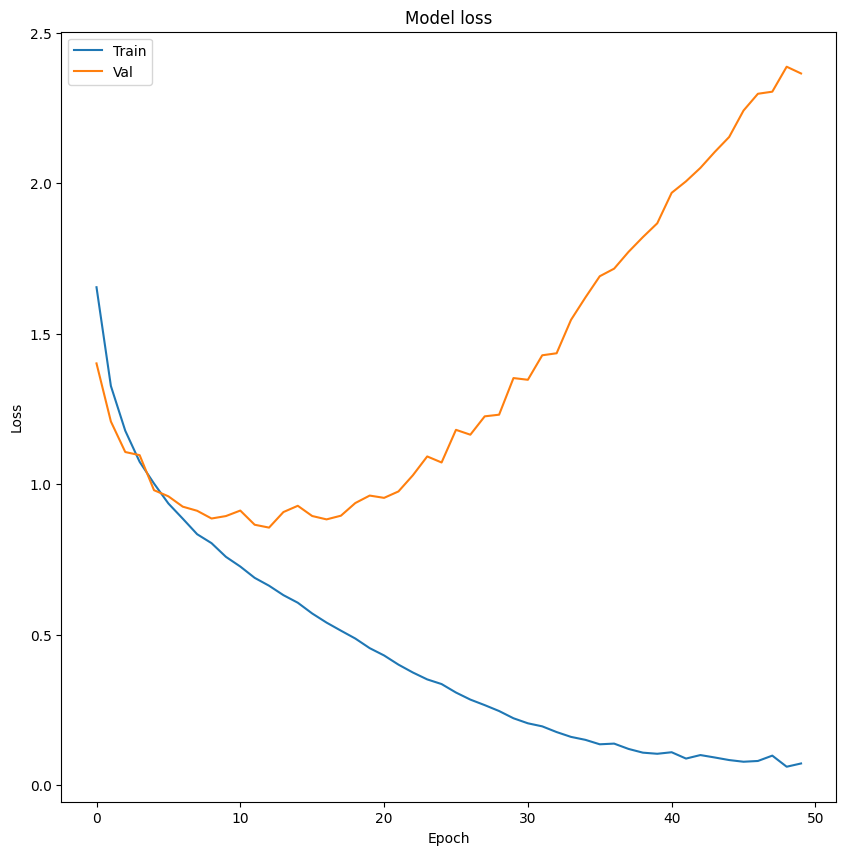

In [ ]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Exercise 3: Train a CNN with 2 Conv Blocks before each Maxpooling hidden layer

In [ ]:
# Define the model

input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=14, kernel_size=(3, 3), activation='relu')(input_layer)
conv_layer_12 = Conv2D(filters=14, kernel_size=(3, 3), activation='relu')(conv_layer_1)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_12)
conv_layer_2 = Conv2D(filters=24, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
conv_layer_22 = Conv2D(filters=24, kernel_size=(3, 3), activation='relu')(conv_layer_2)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
conv_layer_32 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(conv_layer_3)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
output_layer = Dense(10, activation='softmax')(dense_layer)
model= Model(inputs=input_layer, outputs=output_layer)


In [ ]:
# Show summary of the model
# Show summary of the model

model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 30, 30, 14)        392       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 14)        1778      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 14)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 24)        3048      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 24)          0         
 g2D)                                                      

In [ ]:
# Compile the model
# Compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


In [ ]:
# Train the model
# Train the model
# Train the model
history = model.fit(X_train_fl2, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val2, y_val2))

Epoch 1/20
391/391 [==============================] - 8s 8ms/step - loss: 1.6964 - accuracy: 0.3752 - val_loss: 1.4242 - val_accuracy: 0.4840
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 1.3724 - accuracy: 0.5007 - val_loss: 1.3064 - val_accuracy: 0.5352
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 1.2542 - accuracy: 0.5510 - val_loss: 1.2073 - val_accuracy: 0.5736
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 1.1593 - accuracy: 0.5882 - val_loss: 1.1132 - val_accuracy: 0.6058
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 1.0841 - accuracy: 0.6164 - val_loss: 1.0791 - val_accuracy: 0.6200
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 1.0254 - accuracy: 0.6382 - val_loss: 1.0385 - val_accuracy: 0.6360
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 0.9719 - accuracy: 0.6555 - val_loss: 1.0156 - val_accuracy: 0.6468
Epoch 

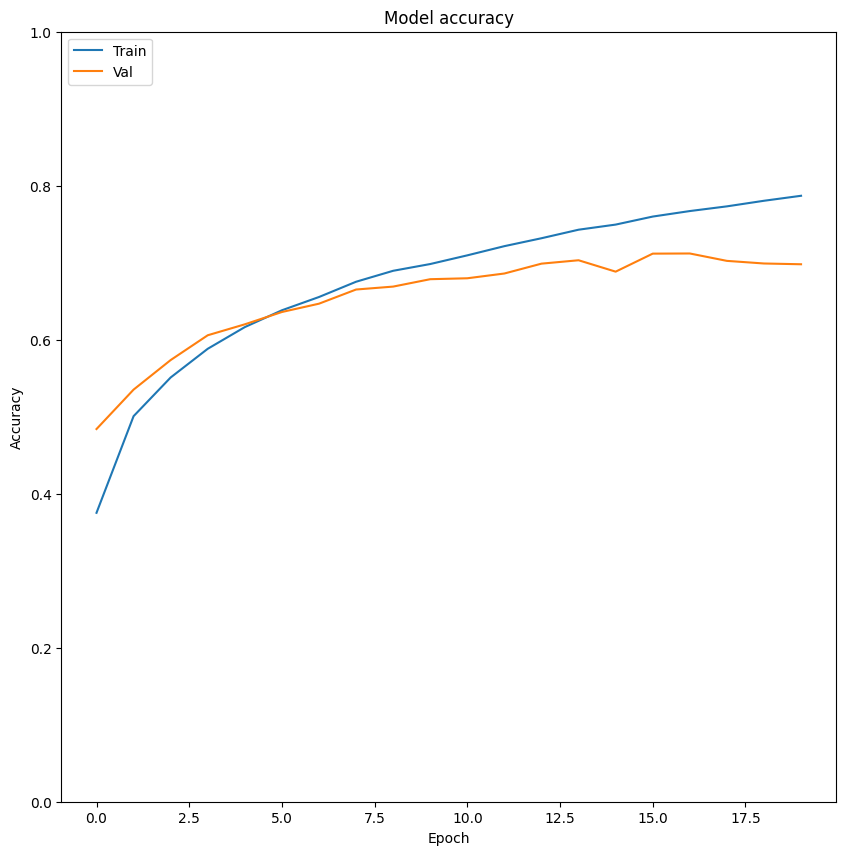

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

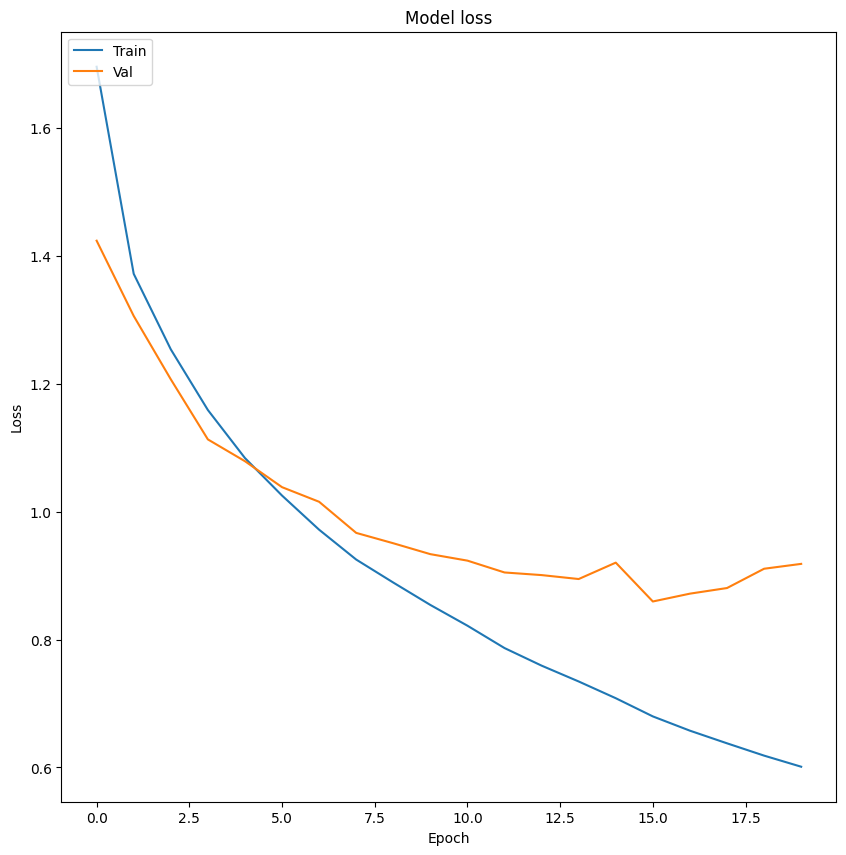

In [ ]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Al añadir más filtros no mejora ya que no  estamos aplicando mejoras para evitar que se produzca el descenso del gradiente.

incrementr filtros incrementa complejidad

# Exercise 4: Experiment to improve results